# Time Series-1

#### Q1. What is a time series, and what are some common applications of time series analysis?

A time series is a sequence of data points collected or recorded at regular time intervals, typically in chronological order. Each data point represents observations made at specific time points. Time series analysis involves studying and modeling these data points to understand underlying patterns, trends, and make predictions. Common applications of time series analysis include stock market forecasting, weather prediction, demand forecasting in supply chain management, monitoring and anomaly detection in IoT sensor data, and studying economic indicators.

#### Q2. What are some common time series patterns, and how can they be identified and interpreted?

Common time series patterns include:
* Trend: A consistent upward or downward movement over time.
* Seasonality: Repeating patterns or cycles at fixed intervals, often related to calendar seasons.
* Cyclic Patterns: Longer-term periodic fluctuations that are not necessarily related to seasons.
* Noise: Random variations or irregularities in the data.

These patterns can be identified and interpreted through visualization techniques, statistical analysis, and time series modeling. For example, a positive trend in sales data may indicate business growth, while seasonality in temperature data may suggest annual temperature fluctuations.

#### Q3. How can time series data be preprocessed before applying analysis techniques?

Time series data preprocessing involves several steps:
* Handling missing data points.
* Resampling to achieve uniform time intervals.
* Dealing with outliers and anomalies.
* Detrending to remove trend components.
* Differencing to make data stationary.
* Scaling and normalization.

#### Q4. How can time series forecasting be used in business decision-making, and what are some common challenges and limitations?

Time series forecasting is crucial in business decision-making for demand forecasting, resource allocation, inventory management, and financial planning. Accurate forecasts can optimize operations and reduce costs. Common challenges include dealing with noisy data, selecting appropriate models, handling seasonality, and adapting to sudden changes in trends. Limitations include the assumption that the future will resemble the past and the inability to account for unexpected events.

#### Q5. What is ARIMA modelling, and how can it be used to forecast time series data?

**ARIMA (AutoRegressive Integrated Moving Average)** modeling is a popular method for forecasting time series data. It combines autoregressive (AR) and moving average (MA) components, along with differencing to make the data stationary. ARIMA models are used to capture trend and seasonality patterns in the data and can provide forecasts based on historical observations.

#### Q6. How do Autocorrelation Function (ACF) and Partial Autocorrelation Function (PACF) plots help in identifying the order of ARIMA models?

ACF and PACF plots help identify the order of ARIMA models:
* ACF shows the autocorrelations at different lags, helping identify the order of the MA component.
* PACF shows the partial autocorrelations, helping identify the order of the AR component.

#### Q7. What are the assumptions of ARIMA models, and how can they be tested for in practice?

Assumptions of ARIMA models include stationarity (data has constant statistical properties over time) and white noise errors (residuals are independent and identically distributed). These assumptions can be tested using statistical tests and visual inspection of residuals. If assumptions are violated, model adjustments may be necessary.

#### Q8. Suppose you have monthly sales data for a retail store for the past three years. Which type of time series model would you recommend for forecasting future sales, and why?

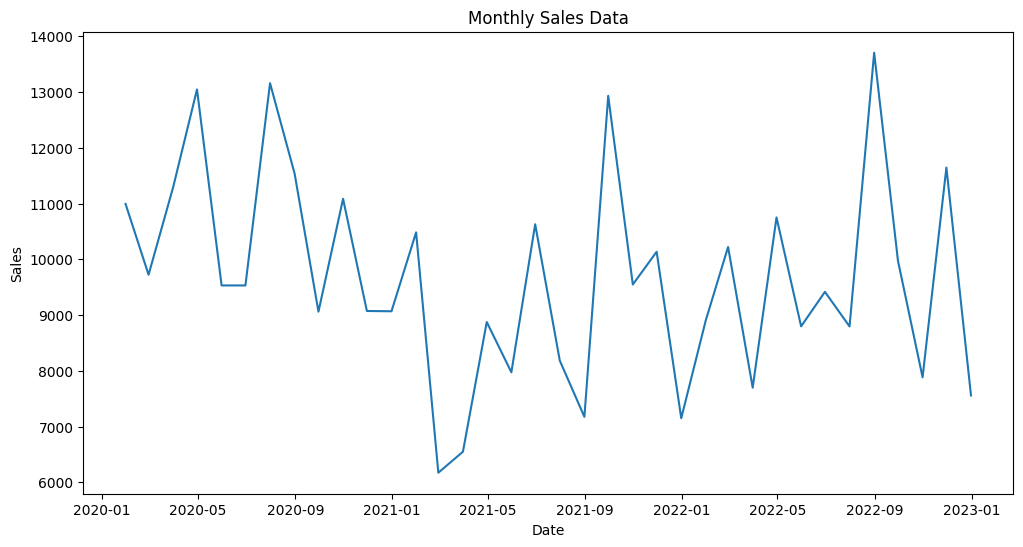

C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency M will be used.
  self._init_dates(dates, freq)
C:\Users\SALESKEN\AppData\Local\Programs\Python\Python310\lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   36
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -216.581
Date:                            Tue, 05 Sep 2023   AIC                            443.163
Time:                                    13:52:03   BIC                            448.840
Sample:                                01-31-2020   HQIC                           444.591
                                     - 12-31-2022                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0612      0.908     -0.067      0.946      -1.841       1.718
ma.L1         -0.4376      0.767   

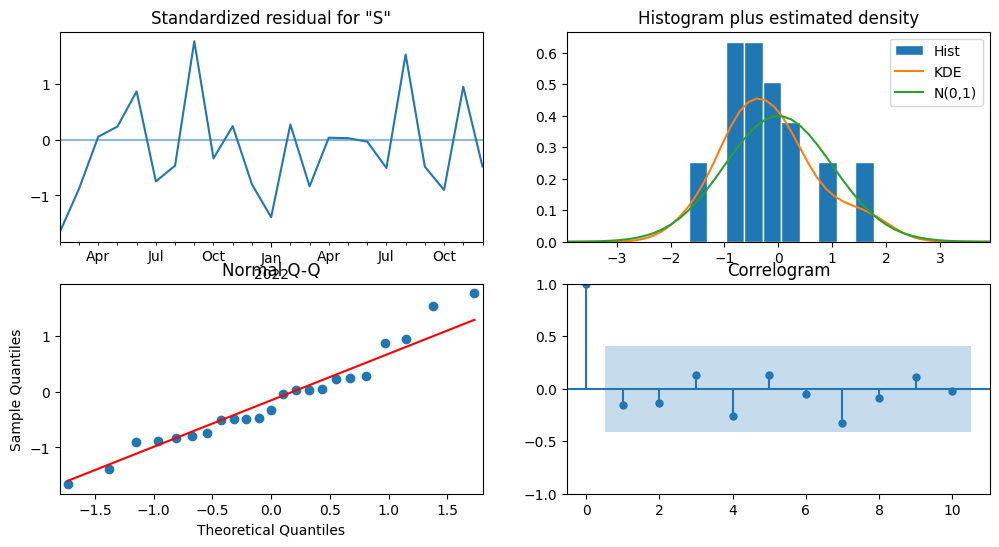

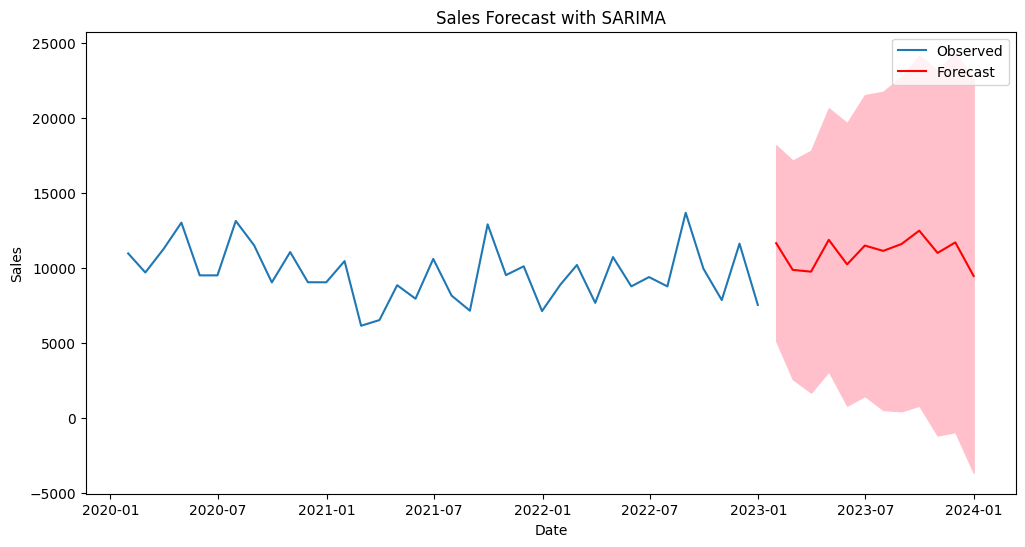

In [1]:
import pandas as pd
import numpy as ny
import matplotlib.pyplot as pt
import statsmodels.api as sm
# Generate a random date range for three years
start_date = "2020-01-01"
end_date = "2022-12-31"
date = pd.date_range(start=start_date, end=end_date, freq='M')
# Generate random sales data
ny.random.seed(42)
sales_data = ny.random.normal(loc=10000, scale=2000, size=len(date)).astype(int)
# Create a DataFrame with the date and sales columns
df = pd.DataFrame({'Date': date, 'Sales': sales_data})
# Convert the date column to datetime format and set it as the index
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
# Visualize the sales data
pt.figure(figsize=(12, 6))
pt.plot(df)
pt.title('Monthly Sales Data')
pt.xlabel('Date')
pt.ylabel('Sales')
pt.show()
# Fit a Seasonal ARIMA model (SARIMA)
order = (1, 1, 1)
seasonal_order = (1, 1, 1, 12)
model = sm.tsa.SARIMAX(df, order=order, seasonal_order=seasonal_order)
results = model.fit()
# Print the model summary
print(results.summary())
# Plot the model diagnostics
results.plot_diagnostics(figsize=(12, 6))
pt.show()
# Make forecasts
forecast_steps = 12 
forecast = results.get_forecast(steps=forecast_steps)
# Get the forecasted values and confidence intervals
forecast_values = forecast.predicted_mean
forecast_ci = forecast.conf_int()
# Plot the observed data and the forecast
pt.figure(figsize=(12, 6))
pt.plot(df, label='Observed')
pt.plot(forecast_values.index, forecast_values.values, color='red', label='Forecast')
pt.fill_between(forecast_ci.index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink')
pt.title('Sales Forecast with SARIMA')
pt.xlabel('Date')
pt.ylabel('Sales')
pt.legend()
pt.show()

#### Q9. What are some of the limitations of time series analysis? Provide an example of a scenario where the limitations of time series analysis may be particularly relevant.

Limitations of time series analysis include the reliance on historical data, which may not account for sudden, unexpected events. Time series models can struggle with long-term forecasts, and assumptions like stationarity may not always hold. For example, a financial crisis can significantly impact stock market predictions, as historical data may not capture such events.

#### Q10. Explain the difference between a stationary and non-stationary time series. How does the stationarity of a time series affect the choice of forecasting model?

* Stationary Time Series: In a stationary time series, the statistical properties (e.g., mean, variance) do not change over time. It simplifies modeling as the relationships between data points remain consistent. Stationarity is crucial for ARIMA models, which assume stationarity in their differenced data.
* Non-Stationary Time Series: Non-stationary time series have changing statistical properties over time. They may exhibit trends, seasonality, or other forms of non-constant behavior. Non-stationary data often requires differencing or other transformations to make it stationary for modeling.

The stationarity of a time series affects the choice of forecasting model because models like ARIMA are designed to work with stationary data. Non-stationary data may require differencing or other transformations to remove trends or seasonality before applying such models.